In [21]:
# imports
import pandas as pd
import numpy as np

import time
import datetime

import math
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

from sklearn.model_selection import train_test_split

In [3]:
# Read data
churn= pd.read_csv("Churn_Modelling.csv")

In [4]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Explore data

In [ ]:
"""

Variables:

RowNumber — corresponds to the record (row) number and has no effect on the output. This column will be removed.

CustomerId — contains random values and has no effect on customer leaving the bank. This column will be removed.

Surname — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography — a customer’s location can affect their decision to leave the bank. We’ll keep this column.

Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts — refers to the number of products that a customer has purchased through the bank.

HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

IsActiveMember — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)



"""

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [32]:
# check variables (num or cat)
numeric= churn.select_dtypes(include=np.number)

In [33]:
numeric

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [9]:
churn.select_dtypes(exclude=np.number)

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [10]:
# check Nan values
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
# check unique values
churn.CustomerId.value_counts()

15812607    1
15741078    1
15635776    1
15740223    1
15738174    1
           ..
15743714    1
15639265    1
15641312    1
15684319    1
15695872    1
Name: CustomerId, Length: 10000, dtype: int64

In [15]:
# drop columns not usefull
churn.drop(columns=[ "RowNumber", "CustomerId", "Surname"], inplace=True)

In [16]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
# check unique values column Gender
churn.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [19]:
# check unique values column Geography
churn.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [20]:
# Data visualization

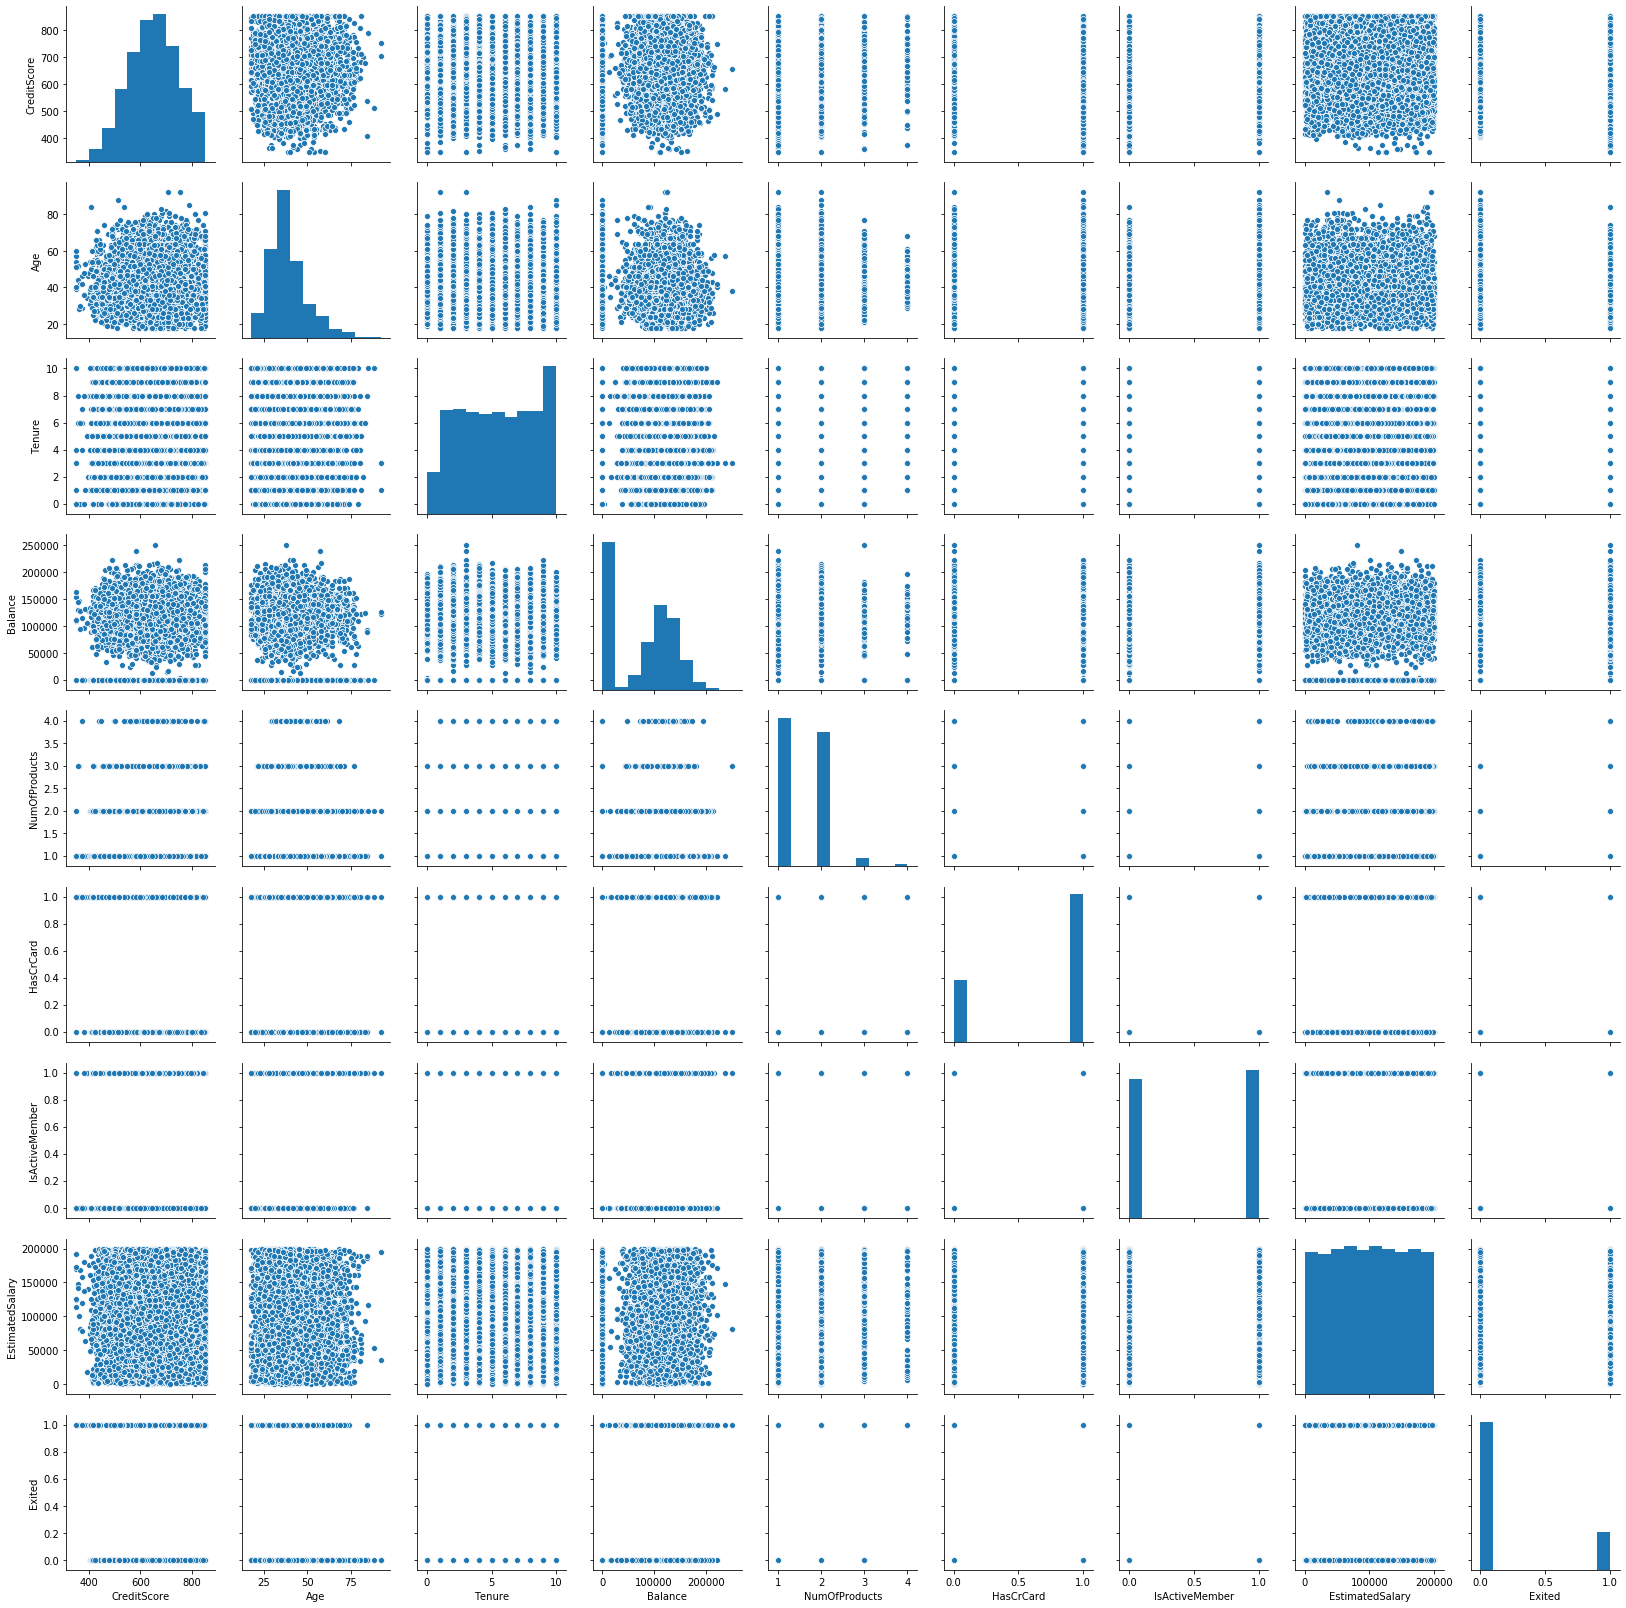

In [22]:
# pairplot
sns.pairplot(churn);

In [34]:
# 
numeric_log= numeric.applymap(np.log)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6977: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(x.astype(object).values, func)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,6.428105,3.737670,0.693147,-inf,0.000000,0.0,0.0,11.526324,0.0
1,6.410175,3.713572,0.000000,11.336282,0.000000,-inf,0.0,11.631087,-inf
2,6.218600,3.737670,2.079442,11.980807,1.098612,0.0,-inf,11.643353,0.0
3,6.549651,3.663562,0.000000,-inf,0.693147,-inf,-inf,11.449204,-inf
4,6.745236,3.761200,0.693147,11.740147,0.000000,0.0,0.0,11.278267,-inf
...,...,...,...,...,...,...,...,...,...
9995,6.647688,3.663562,1.609438,-inf,0.693147,0.0,-inf,11.474919,-inf
9996,6.246107,3.555348,2.302585,10.957270,0.000000,0.0,0.0,11.529780,-inf
9997,6.563856,3.583519,1.945910,-inf,0.000000,-inf,0.0,10.647460,0.0
9998,6.648985,3.737670,1.098612,11.226247,0.693147,0.0,-inf,11.439155,0.0


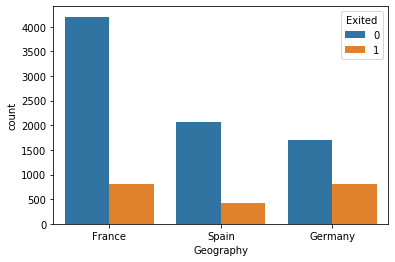

In [23]:
# 
sns.countplot(data=churn, x="Geography", hue="Exited");

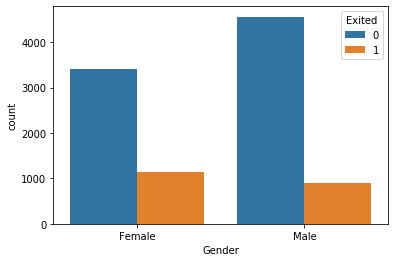

In [28]:
sns.countplot(data=churn, x="Gender", hue="Exited");

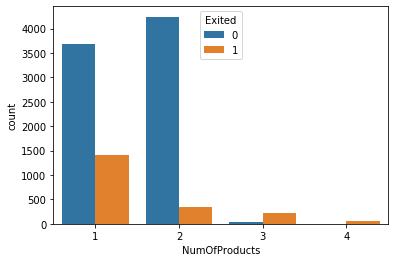

In [29]:
sns.countplot(data=churn, x="NumOfProducts", hue="Exited");

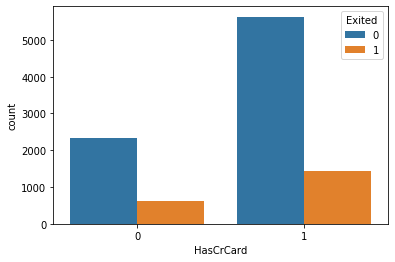

In [30]:
sns.countplot(data=churn, x="HasCrCard", hue="Exited");

In [ ]:
"""
Mayority of clients with credit card are likely to leave
"""

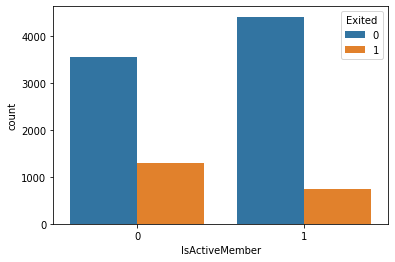

In [31]:
sns.countplot(data=churn, x="IsActiveMember", hue="Exited");

In [ ]:
"""
inctive clients are likely to leave
"""

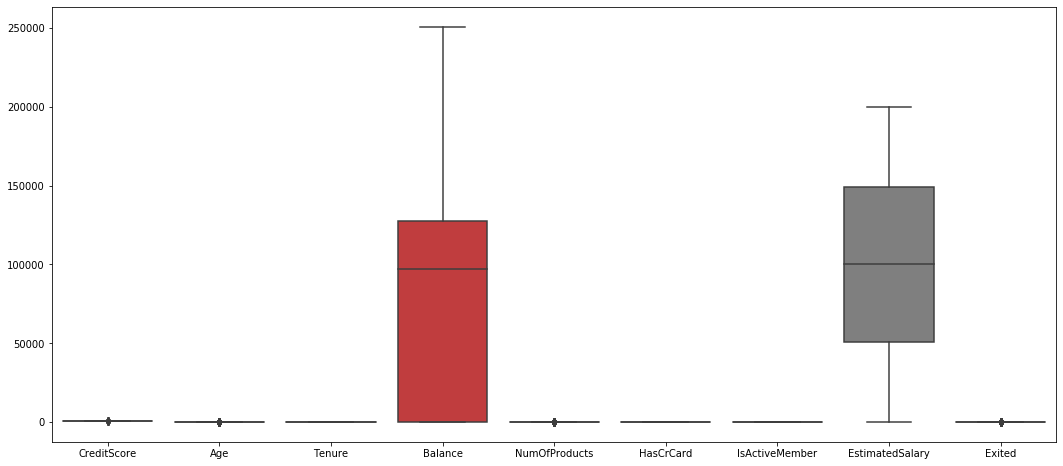

In [42]:
# outliers

items= [col for col in numeric.columns ]
plt.figure(figsize=(18,8))
sns.boxplot(data=churn[items]);


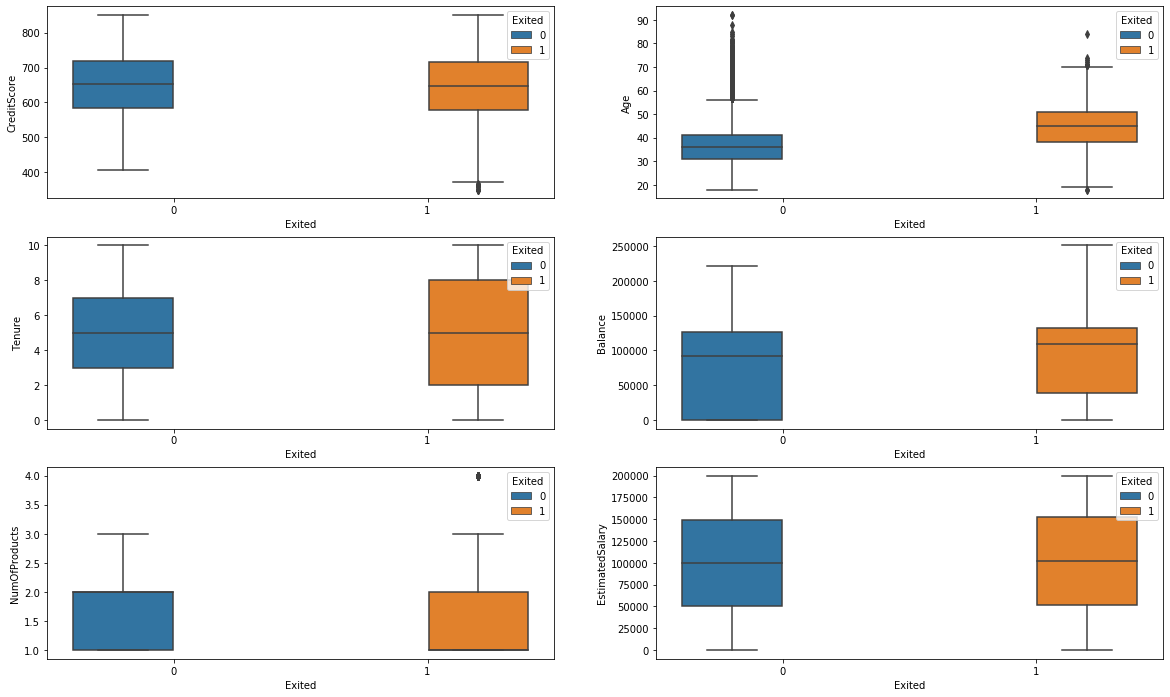

In [54]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = churn , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[2][1]);

In [ ]:
"""
Distribution between clients retained and churned
CreditScore: There is no significant difference between clients retained and churned
Age: Older clients are more likely to leave the bank
Tenure: Not informtive
Balance: Not informative
NumOfProducts: Not informative
EstimatedSalary: Not informative

Outliers
CreditScore, Age and NumOfProducts outliers
"""

In [64]:
# Check Outliers 
for feature in churn[['CreditScore','Age', "Tenure","Balance", 'NumOfProducts', "EstimatedSalary"]]:
    Q1 = churn[feature].quantile(0.25)
    Q3 = churn[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    if churn[(churn[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

CreditScore no
Age yes
Tenure no
Balance no
NumOfProducts yes
EstimatedSalary no


In [81]:
# check outliers of NumOfProductshave

Q1 = churn['NumOfProducts'].quantile(0.25)
Q3 = churn['NumOfProducts'].quantile(0.75)
IQR = Q3-Q1
lower = Q1- 1.5*IQR
upper = Q3 + 1.5*IQR
print(upper)

3.5


In [87]:
# outliers of NumOfProductshave Shape
outliers_NumOfProducts= churn.loc[churn.NumOfProducts>=3.5]
outliers_NumOfProducts.shape

(60, 11)

In [84]:
# check outliers of Age

Q1 = churn['Age'].quantile(0.25)
Q3 = churn['Age'].quantile(0.75)
IQR = Q3-Q1
lower = Q1- 1.5*IQR
upper = Q3 + 1.5*IQR
print(upper)

62.0


In [85]:
# outliers of Age shape
outliers_age= churn.loc[churn.Age>=62]
outliers_age.shape

(411, 11)

In [ ]:
"""
We've seen we have outliers in Age & NumOfProductshave, but not enought to take them out. Also, 
those are outliers that might interest us.
We'll continue with them and see later if we need them or not once doing the model
"""

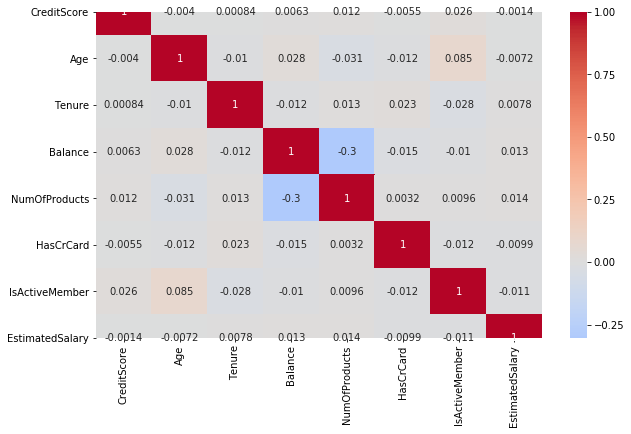

In [96]:
# Check correlation
plt.subplots(figsize=(10, 6))
sns.heatmap(churn[churn.columns[:10]].corr(),annot=True, cmap="coolwarm", center=0);

In [ ]:
"""
No correlation is seen.
"""